<a href="https://colab.research.google.com/github/mukvnd/StrokePredictor/blob/main/StrokePredictor_mod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform, randint
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from keras.metrics import MeanIoU
from sklearn.impute import KNNImputer
df = pd.read_csv('/content/stroke prediction dataset.csv', header = 0)

In [21]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [22]:
num_ft = []
cat_ft = []
for i in df.columns:
  if i!='stroke':
    if df[i].dtype!='int64' and df[i].dtype!='float64':
      cat_ft.append(i)
    else:
      num_ft.append(i)

In [25]:
df = df.replace('Unknown',np.nan)

In [26]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [27]:
df.smoking_status = df.smoking_status.replace({'never smoked' : 1,
                                               'formerly smoked': 2, 
                                                'smokes': 3})
df.work_type = df.work_type.replace({'Private' : 5, 
                                     'Govt_job': 4, 
                                     'Self-employed' : 3, 
                                      'children': 2, 
                                      'Never_worked': 1})

In [28]:
rated_dummies = pd.get_dummies(df[['gender', 'ever_married', 'Residence_type']])

In [29]:
df = pd.concat([df, rated_dummies], axis = 1)

In [30]:
df = df.drop(columns  = ['id', 'gender', 'ever_married', 'Residence_type'], axis = 1)

In [31]:
df

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban
0,67.0,0,1,5,228.69,36.6,2.0,1,0,1,0,0,1,0,1
1,61.0,0,0,3,202.21,NaN,1.0,1,1,0,0,0,1,1,0
2,80.0,0,1,5,105.92,32.5,1.0,1,0,1,0,0,1,1,0
3,49.0,0,0,5,171.23,34.4,3.0,1,1,0,0,0,1,0,1
4,79.0,1,0,3,174.12,24.0,1.0,1,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,5,83.75,NaN,1.0,0,1,0,0,0,1,0,1
5106,81.0,0,0,3,125.20,40.0,1.0,0,1,0,0,0,1,0,1
5107,35.0,0,0,3,82.99,30.6,1.0,0,1,0,0,0,1,1,0
5108,51.0,0,0,5,166.29,25.6,2.0,0,0,1,0,0,1,1,0


In [32]:
from sklearn.impute import KNNImputer
features = ['bmi', 'smoking_status']
X = df[features]
y = df['stroke']
imputer = KNNImputer(n_neighbors=2, weights='distance')
X_imputed = imputer.fit_transform(X)
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)
print(X_imputed.head())

     bmi  smoking_status
0  36.60             2.0
1  28.25             1.0
2  32.50             1.0
3  34.40             3.0
4  24.00             1.0


In [33]:
len(X_imputed)

5110

In [34]:
df = df.drop(columns = ['bmi','smoking_status'], axis = 1)

In [35]:
df = pd.concat([df, X_imputed], axis = 1)

In [36]:
df.shape

(5110, 15)

In [37]:
df.isna().sum()

age                     0
hypertension            0
heart_disease           0
work_type               0
avg_glucose_level       0
stroke                  0
gender_Female           0
gender_Male             0
gender_Other            0
ever_married_No         0
ever_married_Yes        0
Residence_type_Rural    0
Residence_type_Urban    0
bmi                     0
smoking_status          0
dtype: int64

In [38]:
num_ft = []
cat_ft = []
for i in df.columns:
  if i!='stroke':
    if df[i].dtype!='int64' and df[i].dtype!='float64':
      cat_ft.append(i)
    else:
      num_ft.append(i)
cat_ft.append('hypertension')
cat_ft.append('heart_disease')
num_ft.remove('hypertension')
num_ft.remove('heart_disease')
print('categorical',cat_ft)
print('numerical',num_ft)

categorical ['gender_Female', 'gender_Male', 'gender_Other', 'ever_married_No', 'ever_married_Yes', 'Residence_type_Rural', 'Residence_type_Urban', 'hypertension', 'heart_disease']
numerical ['age', 'work_type', 'avg_glucose_level', 'bmi', 'smoking_status']


In [39]:
df['smoking_status'] = df['smoking_status'].astype(int)

numerical




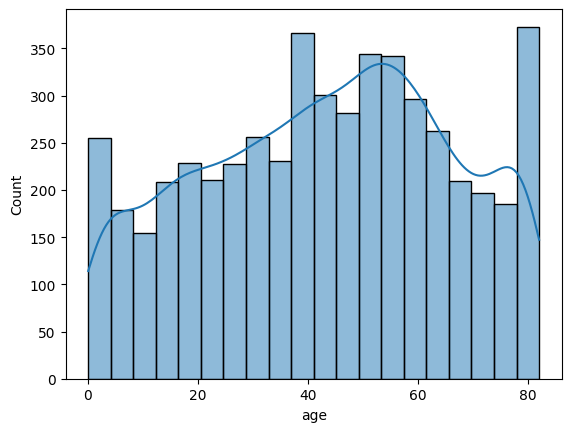

numerical




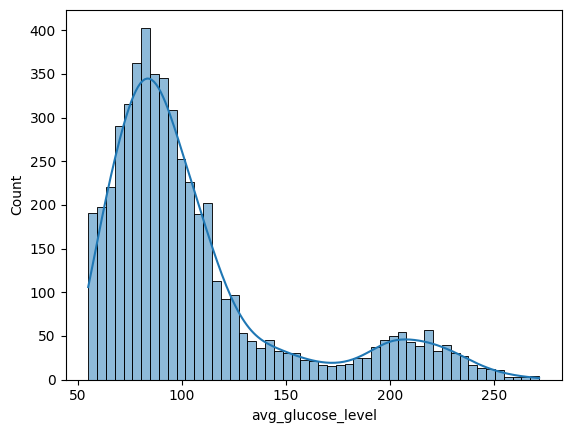

numerical




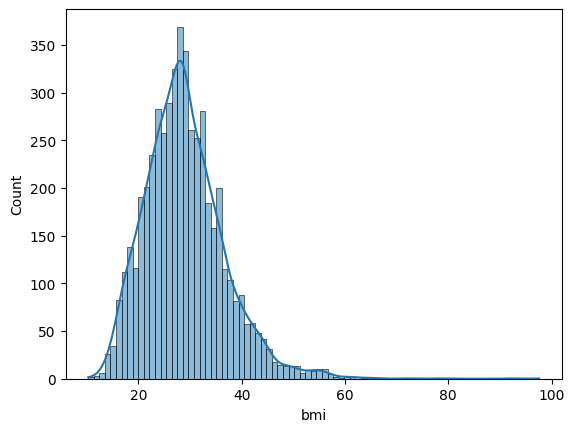

In [40]:
import seaborn as sns
for i in num_ft:
  if i!='work_type' and i!='smoking_status':
    print("numerical\n\n")
    sns.histplot(df[i], kde = True)
    plt.show()

categorical


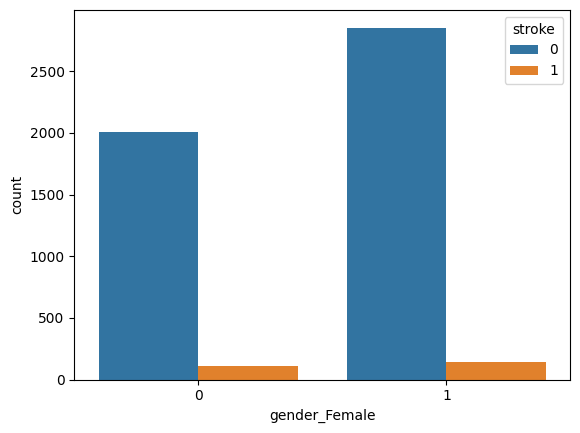

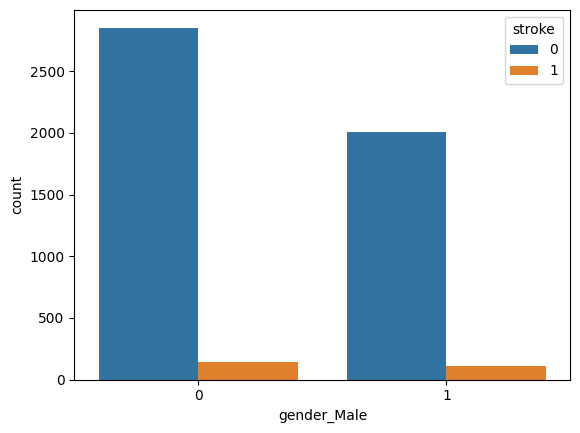

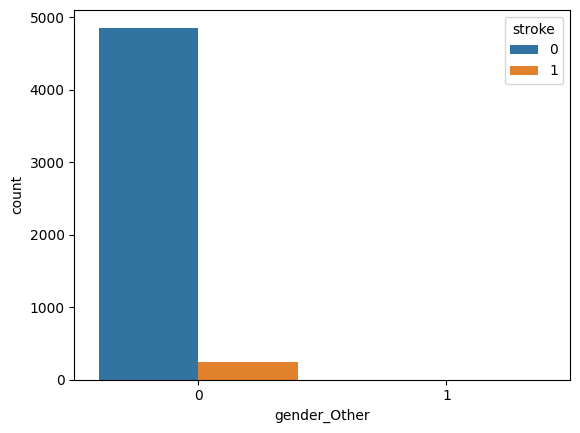

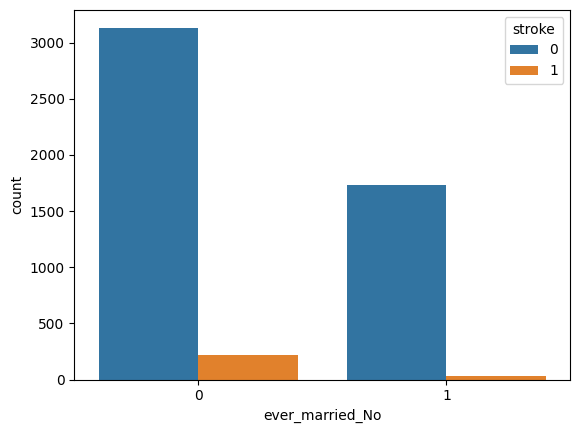

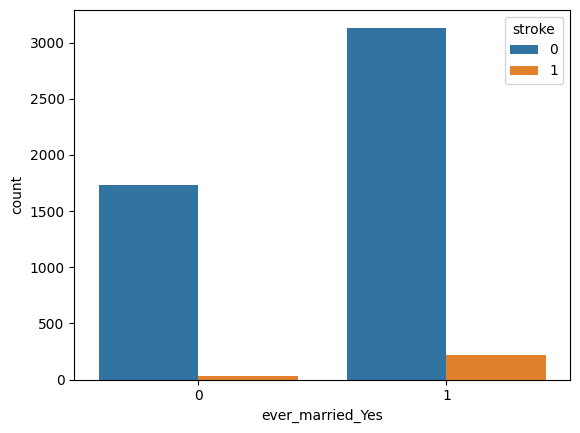

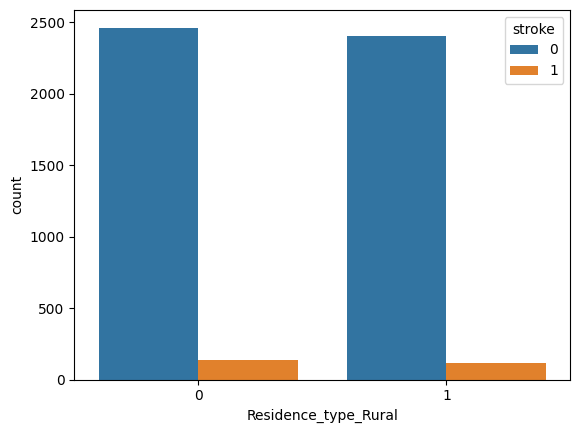

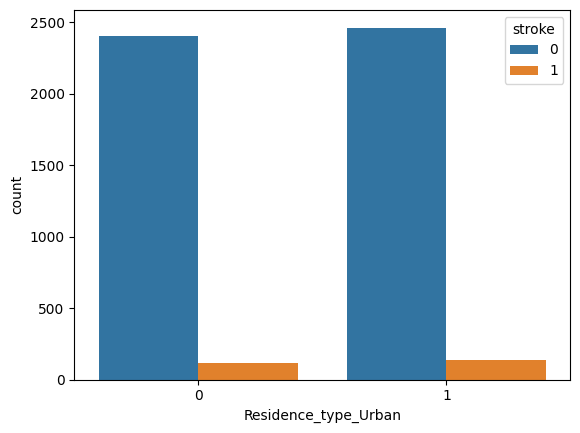

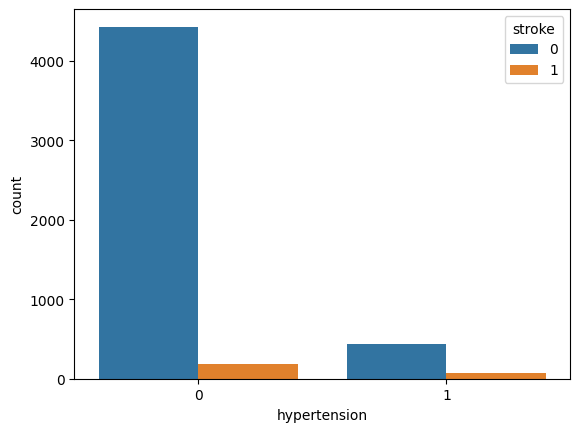

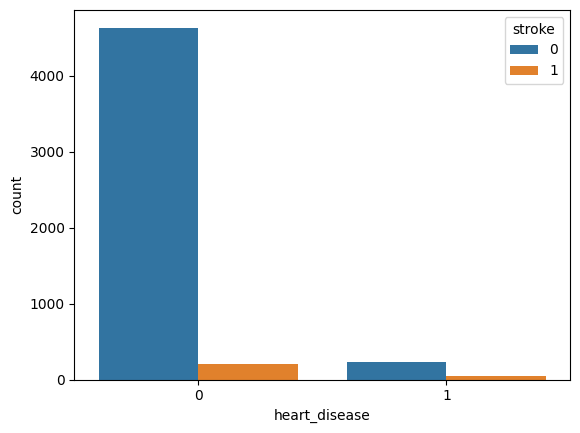

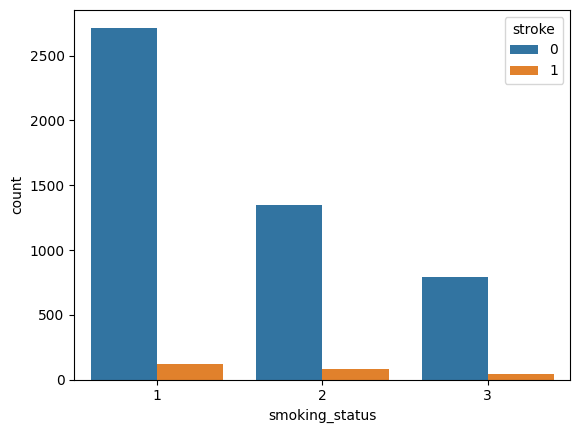

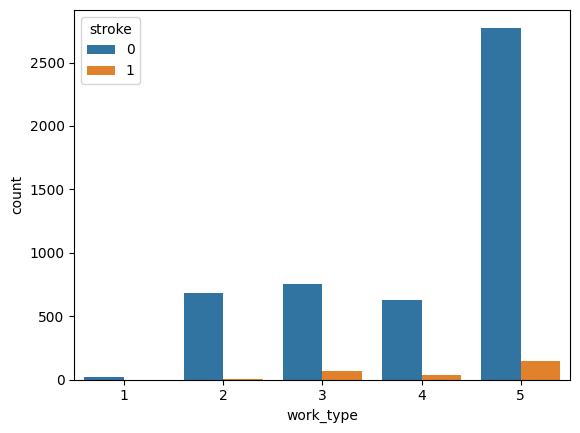

In [41]:
print("categorical")
for i in cat_ft:
  sns.countplot(data = df, x = i, hue = 'stroke')
  plt.show()
for i in ['smoking_status','work_type']:
  sns.countplot(data = df, x = i, hue = 'stroke')
  plt.show()

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.6 MB/s eta 0:00:00


In [44]:
from sklearn.model_selection import train_test_split
feat = df[[ft for ft in df.columns if ft != 'stroke']]
targ = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(feat, targ, test_size=0.1, random_state=42)

In [ ]:
# from scipy.stats import uniform, randint
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


lr_param_grid = {
    "penalty": ["l1", "l2"],
    "C": [0.1, 1, 10],
    "solver": ["liblinear", "saga"],
}


rf_param_grid = {
    "n_estimators": [50, 60, 80, 90, 100],
    "max_depth": [50,100],
    "min_samples_split": [2, 5, 6,7],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None],
    "bootstrap": [True, False],
}


xgb_param_grid = {
    "n_estimators": [50, 60, 80, 90, 100],
    "max_depth": [50,100],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.5, 0.7, 1.0],
    "colsample_bytree": [0.5, 0.7, 1.0],
    "gamma": [0, 1, 5],
    "random_state": [42],
}


lgb_param_grid = {
    "n_estimators": [50, 60, 80, 90, 100],
    "max_depth": [5, 10, 15],
    "learning_rate": [0.01, 0.05, 0.1],
    "num_leaves": [31, 63, 127],
    "subsample": [0.5, 0.7, 1.0],
    "colsample_bytree": [0.5, 0.7, 1.0],
    "reg_alpha": [0, 1, 5],
    "reg_lambda": [0, 1, 5],
    "random_state": [42],
}


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lr_model = LogisticRegression()
rf_model = RandomForestClassifier()
xgb_model = XGBClassifier()
lgb_model = LGBMClassifier()



lr_random_search = RandomizedSearchCV(
    lr_model, lr_param_grid, cv=skf, scoring="recall_macro", random_state=42
)

rf_random_search = RandomizedSearchCV(
    rf_model, rf_param_grid, n_iter=10, cv=skf, scoring="recall_macro", random_state=42
)

xgb_random_search = RandomizedSearchCV(
    xgb_model, xgb_param_grid, n_iter=10, cv=skf, scoring="recall_macro", random_state=42
)

lgb_random_search = RandomizedSearchCV(
    lgb_model, lgb_param_grid, n_iter=10, cv=skf, scoring="recall_macro", random_state=42
)

lr_random_search.fit(X_train, y_train)
print("Logistic Regression:")
print("Best hyperparameters: ", lr_random_search.best_params_)
lr_score = lr_random_search.score(X_test, y_test)
print("Random Forest Classification recall score: ", lr_score)

rf_random_search.fit(X_train, y_train)
print("Random Forest Classification:")
print("Best hyperparameters: ", rf_random_search.best_params_)
rf_score = rf_random_search.score(X_test, y_test)
print("Random Forest Classification recall score:", rf_score)

xgb_random_search.fit(X_train, y_train)
print("XGBoost Classification:")
print("Best hyperparameters: ", xgb_random_search.best_params_)
xgb_score = xgb_random_search.score(X_test, y_test)
print("XGBoost Classification recall score: ", xgb_score)

lgb_random_search.fit(X_train, y_train)
print("LGB Classification:")
print("Best hyperparameters: ", lgb_random_search.best_params_)
lgb_score = lgb_random_search.score(X_test, y_test)
print("LGB Classification recall score: ", lgb_score)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Logistic Regression:
Best hyperparameters:  {'solver': 'liblinear', 'penalty': 'l2', 'C': 10}
Random Forest Classification recall score:  0.5
Random Forest Classification:
Best hyperparameters:  {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 50, 'bootstrap': True}
Random Forest Classification recall score: 0.4989648033126294
XGBoost Classification:
Best hyperparameters:  {'subsample': 1.0, 'random_state': 42, 'n_estimators': 90, 'max_depth': 100, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}
XGBoost Classification recall score:  0.4968944099378882
LGB Classification:
Best hyperparameters:  {'subsample': 0.7, 'reg_lambda': 0, 'reg_alpha': 0, 'random_state': 42, 'num_leaves': 63, 'n_estimators': 80, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.7}
LGB Classification recall score:  0.4989648033126294


In [50]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
best_model_1 = LogisticRegression(solver='liblinear', penalty='l2', C=10)
best_model_2 = XGBClassifier(subsample=1.0, random_state=42, n_estimators=90, max_depth=100, learning_rate=0.05, gamma=0, colsample_bytree=1.0)
best_model_3 = RandomForestClassifier(n_estimators=50, min_samples_split=5, min_samples_leaf=2, max_features=None, max_depth=50, bootstrap=True)
best_model_4 = LGBMClassifier(subsample=0.7, reg_lambda=0, reg_alpha=0, random_state=42, num_leaves=63, n_estimators=80, max_depth=5, learning_rate=0.1, colsample_bytree=0.7)

In [51]:
best_model_1 = best_model_1.fit(X_train,y_train)
best_model_2 = best_model_2.fit(X_train,y_train)
best_model_3 = best_model_3.fit(X_train,y_train)
best_model_4 = best_model_4.fit(X_train,y_train)

In [52]:
y_pred_1 = best_model_1.predict(X_test)
y_pred_2 = best_model_2.predict(X_test)
y_pred_3 = best_model_3.predict(X_test)
y_pred_4 = best_model_4.predict(X_test)

In [53]:
from sklearn.metrics import classification_report
print("logisitic regression")
print(classification_report(y_test,y_pred_1))
print("xgb classifier")
print(classification_report(y_test,y_pred_2))
print("random forest classifier")
print(classification_report(y_test,y_pred_3))
print("lgbm classifier")
print(classification_report(y_test,y_pred_4))

logisitic regression
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       483
           1       0.00      0.00      0.00        28

    accuracy                           0.95       511
   macro avg       0.47      0.50      0.49       511
weighted avg       0.89      0.95      0.92       511

xgb classifier
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       483
           1       0.25      0.04      0.06        28

    accuracy                           0.94       511
   macro avg       0.60      0.51      0.52       511
weighted avg       0.91      0.94      0.92       511

random forest classifier
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       483
           1       0.00      0.00      0.00        28

    accuracy                           0.94       511
   macro avg       0.47      0.50      0.48       511
weighted avg 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [54]:
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)
feat = df_shuffled[[ft for ft in df.columns if ft != 'stroke']]
targ = df_shuffled['stroke']
best_model_1 = best_model_1.fit(feat,targ)
best_model_2 = best_model_2.fit(feat, targ)
best_model_3 = best_model_3.fit(feat,targ)
best_model_4 = best_model_4.fit(feat,targ)

In [55]:
y_pred_1 = best_model_1.predict(X_test)
y_pred_2 = best_model_2.predict(X_test)
y_pred_3 = best_model_3.predict(X_test)
y_pred_4 = best_model_4.predict(X_test)

In [56]:
from sklearn.metrics import classification_report
print("logisitic regression")
print(classification_report(y_test,y_pred_1))
print("xgb classifier")
print(classification_report(y_test,y_pred_2))
print("random forest classifier")
print(classification_report(y_test,y_pred_3))
print("lgbm classifier")
print(classification_report(y_test,y_pred_4))

logisitic regression
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       483
           1       0.00      0.00      0.00        28

    accuracy                           0.95       511
   macro avg       0.47      0.50      0.49       511
weighted avg       0.89      0.95      0.92       511

xgb classifier
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       483
           1       1.00      0.68      0.81        28

    accuracy                           0.98       511
   macro avg       0.99      0.84      0.90       511
weighted avg       0.98      0.98      0.98       511

random forest classifier
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       483
           1       1.00      0.46      0.63        28

    accuracy                           0.97       511
   macro avg       0.98      0.73      0.81       511
weighted avg 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
import pickle
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model_3, f)